# Stock price prediction with LSTM (Long Short Term Memory)

### Import packages

In [25]:
# fetch data and print stock data from yahoo finance api
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
import numpy as np
import tensorflow as tf


In [16]:
warnings.filterwarnings('ignore')

In [17]:
# get stock data
stock_data = yf.download('TATAELXSI.NS', start='2004-01-01', end='2023-12-31')
print(stock_data.head())
print(stock_data.shape)



[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2004-01-01  60.849998  61.950001  60.599998  61.375000  39.528210   561346
2004-01-02  61.849998  65.675003  61.525002  64.050003  41.251038  2051598
2004-01-05  64.650002  65.500000  62.525002  63.125000  40.655289  1461746
2004-01-06  63.500000  64.699997  60.250000  60.924999  39.238392  1013920
2004-01-07  61.099998  61.349998  58.500000  59.424999  38.272331   764548
(4948, 6)


### Plot line chart based on closing price

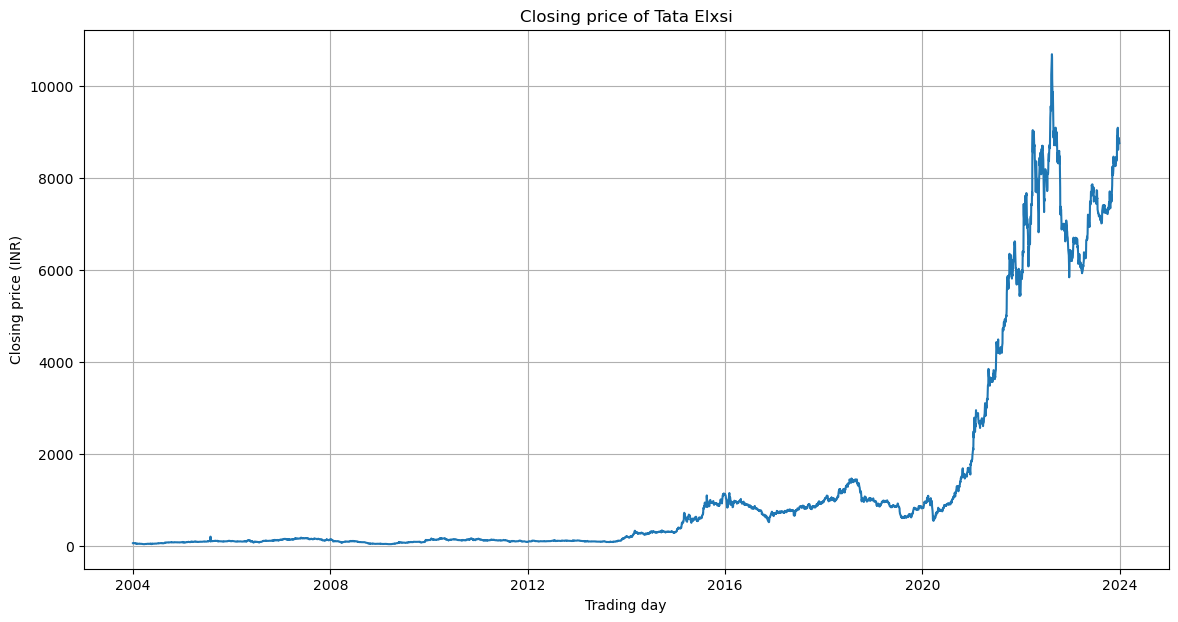

In [18]:
# plot line chart based on closing price
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'])
plt.title('Closing price of Tata Elxsi')
plt.ylabel('Closing price (INR)')
plt.xlabel('Trading day')
plt.grid(True)
plt.show()



In [19]:
# split data into training and test set

train_data = stock_data[:'2017-12-31']
test_data = stock_data['2018-01-01':]
print(train_data.shape)
print(test_data.shape)

(3467, 6)
(1481, 6)


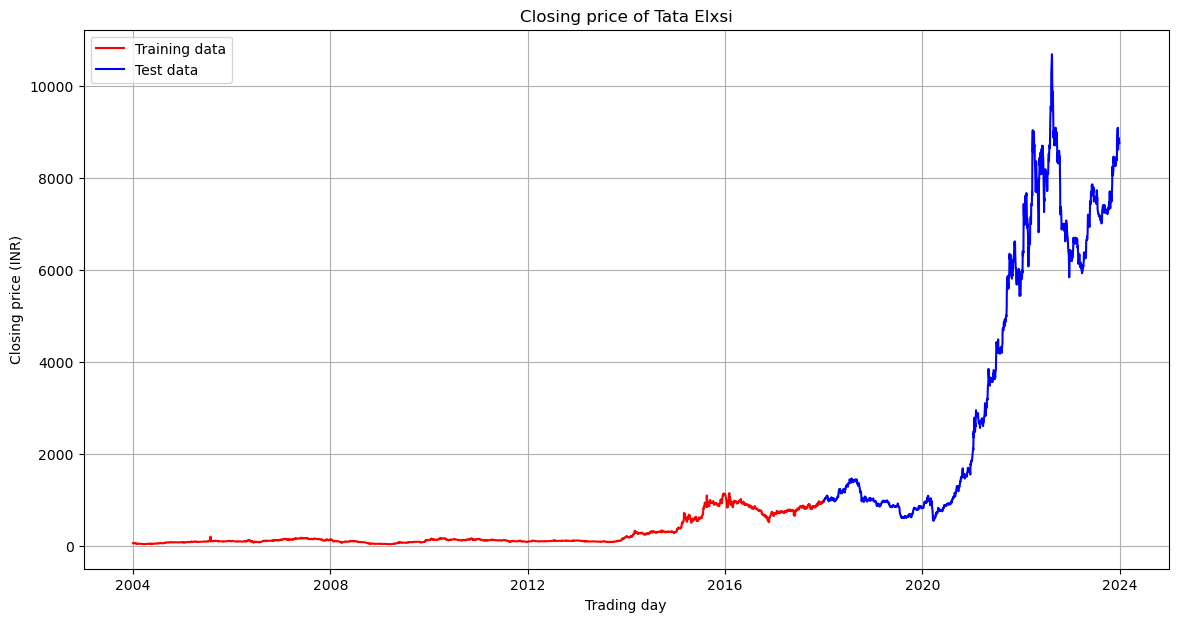

In [20]:
# plot line chart based on closing price

plt.figure(figsize=(14, 7))
plt.plot(train_data['Close'], 'red', label='Training data')
plt.plot(test_data['Close'], 'blue', label='Test data')
plt.title('Closing price of Tata Elxsi')
plt.ylabel('Closing price (INR)')
plt.xlabel('Trading day')
plt.legend()
plt.grid(True)
plt.show()

### Scale data between 0 and 1

In [21]:
# scale data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.fit_transform(test_data)
print(train_data_scaled.shape)
print(test_data_scaled.shape)


(3467, 6)
(1481, 6)


### Create training and test data

In [22]:
# create training and test data
X_train = []
y_train = []
for i in range(60, train_data_scaled.shape[0]):
    X_train.append(train_data_scaled[i-60:i, 0])
    y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)


(3407, 60)
(3407,)


### Train model using LSTM (Long Short Term Memory)

In [23]:
# train model using LSTM (Long Short Term Memory)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# save model
model.save('stock_price_prediction.keras')
model.save('stock_price_prediction.h5')


Epoch 1/10
107/107 [==============================] - 4s 26ms/step - loss: 0.0064
Epoch 2/10
107/107 [==============================] - 3s 28ms/step - loss: 9.3916e-04
Epoch 3/10
107/107 [==============================] - 3s 27ms/step - loss: 0.0011
Epoch 4/10
107/107 [==============================] - 3s 27ms/step - loss: 8.7808e-04
Epoch 5/10
107/107 [==============================] - 3s 28ms/step - loss: 7.9211e-04
Epoch 6/10
107/107 [==============================] - 3s 27ms/step - loss: 9.4952e-04
Epoch 7/10
107/107 [==============================] - 3s 27ms/step - loss: 7.3935e-04
Epoch 8/10
107/107 [==============================] - 3s 28ms/step - loss: 7.6082e-04
Epoch 9/10
107/107 [==============================] - 3s 28ms/step - loss: 6.7287e-04
Epoch 10/10
107/107 [==============================] - 3s 28ms/step - loss: 7.4646e-04


In [27]:
# load model
model = tf.keras.models.load_model('stock_price_prediction.h5')

# create test data
X_test = []
y_test = []
for i in range(60, test_data_scaled.shape[0]):
    X_test.append(test_data_scaled[i-60:i, 0])
    y_test.append(test_data_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(1421, 60)
(1421,)


In [28]:
# predict stock price
y_pred = model.predict(X_test)
print(y_pred.shape)


45/45 [==============================] - 1s 7ms/step
(1421, 1)


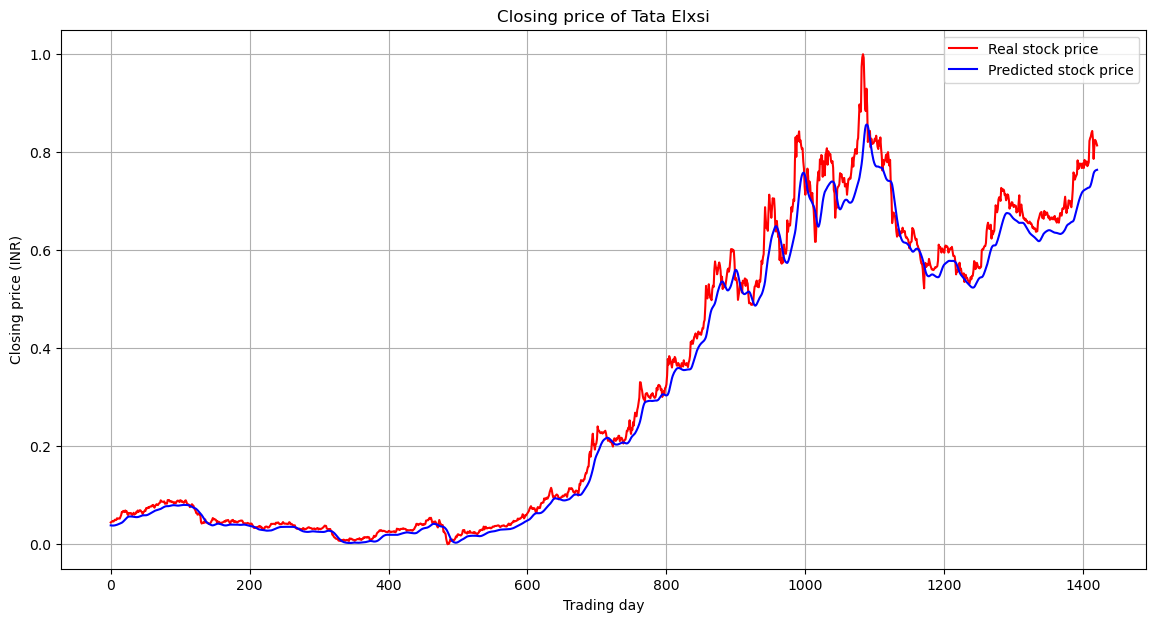

In [29]:
# plot line chart based on closing price
plt.figure(figsize=(14, 7))
plt.plot(y_test, 'red', label='Real stock price')
plt.plot(y_pred, 'blue', label='Predicted stock price')
plt.title('Closing price of Tata Elxsi')
plt.ylabel('Closing price (INR)')
plt.xlabel('Trading day')
plt.legend()
plt.grid(True)
plt.show()